<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/T_Test_notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!gdown 1_2kBsNqufqogMjez4eItqnNgckSVHGF2 -O 'aerofit.csv'
!gdown 1ZK7MFfWJcVCYzBNbymvbv6-dxgnngDw6 -O 'drug_1_recovery.csv'
!gdown 1_C6ddSVLBmBsNEDzJ8AAesafGuBGpHQx -O 'drug_2_recovery.csv'

Downloading...
From: https://drive.google.com/uc?id=1_2kBsNqufqogMjez4eItqnNgckSVHGF2
To: /content/aerofit.csv
100% 7.46k/7.46k [00:00<00:00, 22.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZK7MFfWJcVCYzBNbymvbv6-dxgnngDw6
To: /content/drug_1_recovery.csv
100% 1.10k/1.10k [00:00<00:00, 4.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_C6ddSVLBmBsNEDzJ8AAesafGuBGpHQx
To: /content/drug_2_recovery.csv
100% 1.33k/1.33k [00:00<00:00, 5.04MB/s]


# Improve IQ with a pill

Population IQ average = 100

One researcher claims that his pill will improve IQ

In [3]:
# The pill is given to a few people and their IQ is tested with following results:

iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

Establish result at 99% confidence (0.01 significance "alpha")

In [4]:
# > pop mu - known
# > pop std - unknown -- t-test


In [5]:
mu = 100
m = np.mean(iq_scores) # sample mean
m

103.5

#### H0 : mu = 100 (pill has no effect) <br> HA : mu > 100 (pill has good effect)

In [6]:
print(iq_scores)

[110, 105, 98, 102, 99, 104, 115, 95]


In [7]:
# test_stat : t_stat = (m - mu)/(s/sqrt(n))

In [8]:
# s : sample std dev
s = np.std(iq_scores)
s

6.144102863722254

In [9]:
n = len(iq_scores)
n

8

In [10]:
t_stat = (m - 100)/(s/np.sqrt(n))
t_stat

1.611218945415621

In [11]:
from scipy.stats import t, norm, ttest_1samp

In [12]:
p_value = 1 - t.cdf(x = t_stat, df = n -1)
p_value

0.07558359360350508

In [13]:
alpha = 0.01 # 99% confidence

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("Pill has no effect")

Fail to reject H0
Pill has no effect


### # Drug recovery

##### A well known drug => mean recovery days for fatal XYZ disease = 8 days : population avg (monopoly)

In [14]:
# Company is claiming to be better - mean rec. days of their drug is less

In [15]:
df = pd.read_csv("drug_1_recovery.csv")
df ## drug is tested on 100 people

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [16]:
# 95 % confidence, 5 % significance
# alpha = 0.05

In [17]:
# m : sample mean
# mu : pop. mean
# s : sample std dev.
# n : sample size

In [18]:
m = np.mean(df.drug_1)
m

7.1049166262

In [19]:
mu = 8

In [20]:
s = np.std(df.drug_1)
s

1.0334899643634339

In [21]:
n = len(df)
n

100

In [22]:
z_stat = (m - mu)/(s/np.sqrt(n))
z_stat

-8.660784377827186

In [23]:
t_stat = (m - mu)/(s/np.sqrt(n))
t_stat

-8.660784377827186

In [24]:
# H0 :  mu = 8
# Ha : mu < 8 # left tail test

## Z test

In [25]:
p_value = norm.cdf(z_stat)
p_value

2.3426452208758517e-18

## T- test

In [26]:
p_value = t.cdf(t_stat, n -1)
p_value

4.5168913601959144e-14

In [27]:
alpha = 0.01 # 99% confidence

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


In [28]:
from scipy.stats import ttest_1samp

In [29]:
ttest_1samp(df.drug_1,
            popmean = 8,
            alternative = "less")

TtestResult(statistic=-8.617371651427325, pvalue=5.609171987848786e-14, df=99)

In [30]:
# ttest_2samp

In [31]:
df

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [32]:
d1 = pd.read_csv("drug_1_recovery.csv")
d1

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [33]:
m1 = d1.mean()[0] # mean recovery days
m1

7.1049166262

In [34]:
s1 = d1.std()[0]
s1

1.0386964958761464

In [35]:
n1 = len(d1)
n1

100

In [36]:
d2 = pd.read_csv("drug_2_recovery.csv")
d2

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593
...,...
115,7.861993
116,8.233510
117,5.876257
118,7.789454


In [37]:
m2 = d2.mean()[0]

In [38]:
n2 = len(d2)
n2

120

In [39]:
s2 = d2.std()[0]
s2

1.5532963278547152

In [40]:
print("Drug 1 : ", n1, m1, s1)

Drug 1 :  100 7.1049166262 1.0386964958761464


In [41]:
print("Drug 2 : ", n2, m2, s2)

Drug 2 :  120 8.073423327583333 1.5532963278547152


In [42]:
tstat = (m1 - m2)/np.sqrt((s1**2/n1) + (s2**2/n2))
tstat

-5.510089446679421

In [43]:
m1

7.1049166262

In [44]:
m2

8.073423327583333

In [45]:
d1

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [46]:
d2

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593
...,...
115,7.861993
116,8.233510
117,5.876257
118,7.789454


In [47]:
from scipy.stats import ttest_ind ## ttest for independennt samples

In [48]:
## H0 : mu1 = mu2
## HA : mu1 < mu2 # left tailed
# alpha = 0.01 # 99% confidence

In [49]:
ttest_ind(d1, d2, alternative = "less")

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([1.27713574e-07]))

In [50]:
## p-value <<<< alpha, Reject H0, mean recovery days of drug 1 is lower than drug 2,
# with 99 % confidence or 1 % significance level

In [51]:
# def temp():
#     return 1, 2

# a,b = temp()

# a

# b

# t_stat, p_value = ttest_ind(d1, d2, alternative = "less")


# t_stat

# p_value

In [52]:
d1.head()

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716


In [53]:
d2.head()

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593


In [54]:
d1.mean()

drug_1    7.104917
dtype: float64

In [55]:
d2.mean()

drug_2    8.073423
dtype: float64

## 1st test

In [56]:
## H0 : mu1 = mu2
## HA : mu1 != mu2 # two tailed test
# alpha = 0.01 # 99% confidence


In [57]:
ttest_ind(d1, d2, alternative="two-sided")

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([2.55427147e-07]))

In [58]:
## p-value <<<< alpha, Reject H0, mean recovery days of drug 1 is statistically diff. than drug 2,
# with 99 % confidence or 1 % significance level

## 2nd Test

In [59]:
## H0 : mu1 = mu2
## HA : mu1 < mu2 # test tailed test
# alpha = 0.01 # 99% confidence


In [60]:
ttest_ind(d1, d2, alternative="less")

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([1.27713574e-07]))

In [61]:
## p-value <<<< alpha, Reject H0, mean recovery days of drug 1 is statistically lower than drug 2,
# with 99 % confidence or 1 % significance level

## 3rd Test

In [62]:
## H0 : mu1 = mu2
## HA : mu1 > mu2 # right tailed test
# alpha = 0.01 # 99% confidence


In [63]:
ttest_ind(d1, d2, alternative="greater")

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([0.99999987]))

In [64]:
## p-value >>> alpha, Failed to Reject H0
# with 99 % confidence or 1 % significance level

# Aerofit

In [65]:
df_aerofit = pd.read_csv("aerofit.csv")

In [66]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Gender', ylabel='Income'>

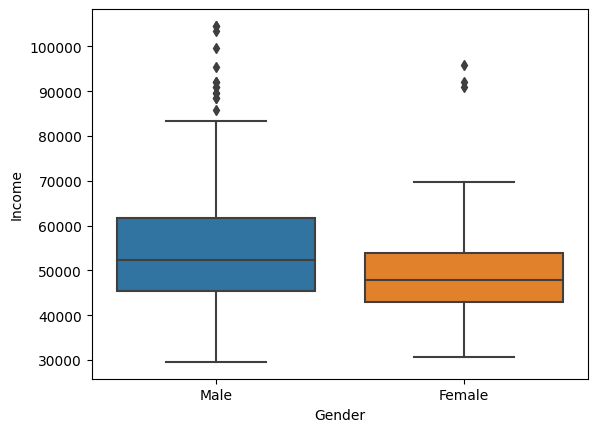

In [67]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit)

In [68]:
df_aerofit.groupby(["Gender"])["Income"].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [69]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]


income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [70]:
# H0 : same income
# HA : mean of male income is higher  # you want to test the suspicion from the observed data
alpha = 0.05

In [71]:
t_stat, p_value = ttest_ind(income_male, income_female, alternative = "greater")


In [72]:
print(p_value)

if p_value < 0.05:
    print("Reject H0")

0.003263631548607129
Reject H0


In [73]:
a = [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

In [74]:
from scipy.stats import ttest_1samp

''' H0 : yield = 12
    Ha : yield > 12
'''

yield_data = [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

ttest_1samp(yield_data, popmean = 12.0, alternative = "greater")

### p_value = 0.0497

### p_value < alpha (0.05)
### i.e. Reject H0, Yield is more than average

TtestResult(statistic=1.8356436949305335, pvalue=0.04979938002326665, df=9)

In [75]:
# The 1-sample t-test is used when we want to compare a sample mean to a population mean. The average British man is 175.3 cm tall.

# A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.

# survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]


# With 5% significance level can we conclude that average height is more different than the population mean?

# Perform t-test and choose the correct option below :

# a) p_value = 0.058, Average sample height is same as population ave
# b) p_value = 0.073, Average sample height is same as expected
# c) p_value = 0.047, Average sample height is greater than expected
# d) p_value = 0.031, Average sample height is greater than expected


In [76]:
from scipy.stats import ttest_1samp

''' H0 : height = 175.3
    Ha : height != 175.3
'''

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

ttest_1samp(survey_height, popmean = 175.3, alternative = "two-sided")

TtestResult(statistic=2.295568968083183, pvalue=0.04734137339747034, df=9)

In [77]:
len(survey_height) - 1

9

In [78]:
2*(t.cdf(-2.2955689, df = len(survey_height) - 1))

0.047341378670844696

In [79]:
t_stat = (np.mean(survey_height) - 175.3)/(np.std(survey_height, ddof=1)/np.sqrt(len(survey_height)))
t_stat

2.295568968083183

In [80]:
2*(1 - t.cdf(t_stat, df = len(survey_height) - 1))

0.047341373397470354

In [81]:
#Day 118 Q5
d1= [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
d2= [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]
ttest_ind(d1, d2, alternative="two-sided")


Ttest_indResult(statistic=-0.36928503344341035, pvalue=0.7154458095186707)

In [82]:
#Day 118 Q4
d1= [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
d2= [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
ttest_ind(d1, d2, alternative="two-sided")


Ttest_indResult(statistic=-2.799960442832919, pvalue=0.010730607904197957)